# vim-emu evaluation

Based on SONATA D5.4, generates inputs for D6.3.

## TODO

- ~~Total setuptime (line, star mesh)~~
- ~~Memory usage~~
- ~~Setup time breakdown~~
- ~~Total setuptime TopologyZoo (time/memory)~~
- ~~Service deployment times (randomized deployment on TopologyZoo topos)~~



In [105]:
# global settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import numpy as np
import seaborn as sns
import pandas as pd
import itertools

In [2]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (10, 5)})

## KPI SDK.3 (Testing environment setup time): Scaling Experiment

Start emulator platform with diffrent number of PoPs for `line`, `star`, and `mesh` topology.

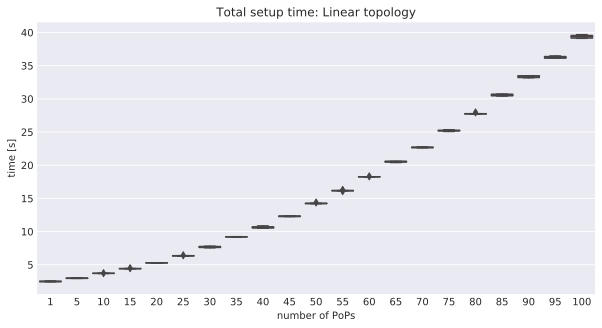

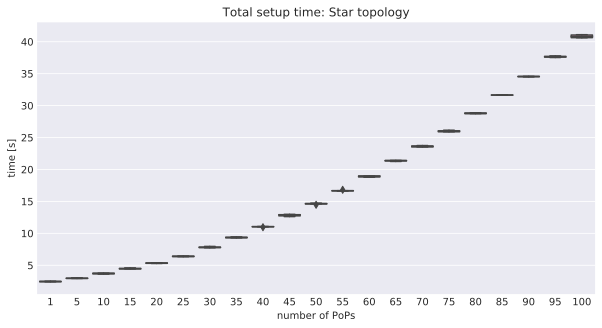

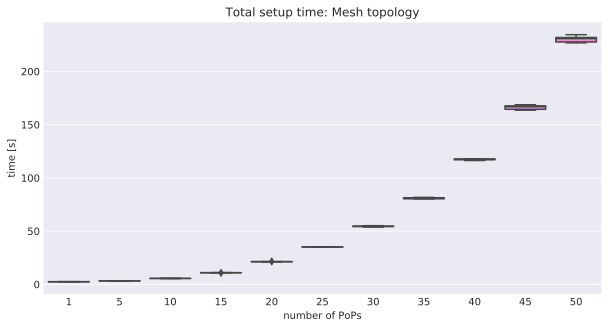

In [3]:
# read results
df = pd.read_pickle("data/2017-12-05-scaling_experiment.pkl")
#print(df)
df_line = df[df["topology"] == "line"]
df_star = df[df["topology"] == "star"]
df_mesh = df[df["topology"] == "mesh"]

#df_line = df_line.groupby(["n_pops"]).mean()
#print(df_line)

def box_plot(d, x="n_pops", y="time_total", title="title", path="plots/boxplot.png"):
    plt.figure()
    ax = sns.boxplot(data=d, x="n_pops", y="time_total")
    ax.set_title(title)
    ax.set_xlabel("number of PoPs")
    ax.set_ylabel("time [s]")
    fig = ax.get_figure()
    fig.savefig(path, dpi=300)
    
box_plot(df_line, title="Total setup time: Linear topology", path="plots/sdk_emu_boxplot_total_line.png")
box_plot(df_star, title="Total setup time: Star topology", path="plots/sdk_emu_boxplot_total_star.png")
box_plot(df_mesh, title="Total setup time: Mesh topology", path="plots/sdk_emu_boxplot_total_mesh.png")



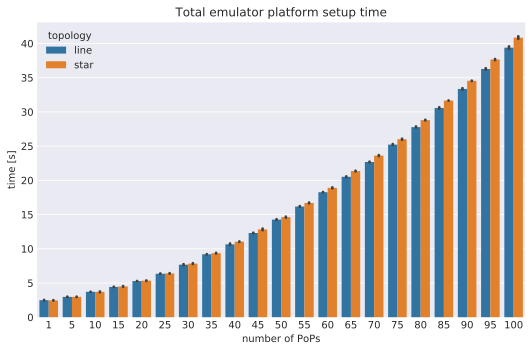

In [4]:
dff = df[df["topology"] != "mesh"].copy()
ax = sns.factorplot(x='n_pops',
                    y='time_total',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("time [s]")
plt.title("Total emulator platform setup time")
plt.tight_layout()
ax.savefig("plots/sdk_emu_startup_compare_line_star.png", dpi=300)

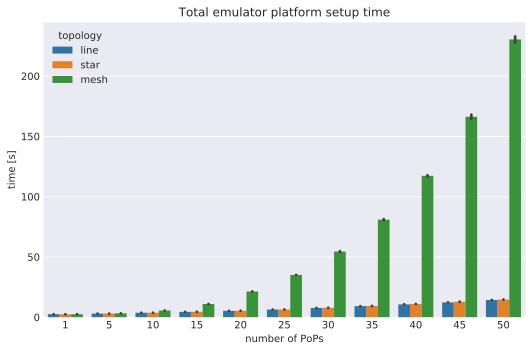

In [5]:
dff = df[df["n_pops"] < 51].copy()
ax = sns.factorplot(x='n_pops',
                    y='time_total',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("time [s]")
plt.title("Total emulator platform setup time")
plt.tight_layout()
ax.savefig("plots/sdk_emu_startup_compare_mesh.png", dpi=300)

## KPI SDK.4 (Test platform scalability): Memory consumption

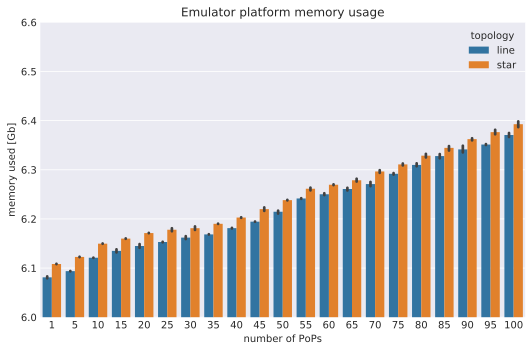

In [6]:
dff = df[df["topology"] != "mesh"].copy()
dff["mem_used"] = dff["mem_used"].map(lambda x: x / (1024 * 1024 * 1024))
#min_mem = dff["mem_used"].min() - 0.1
#dff["mem_used"] -= min_mem
ax = sns.factorplot(x='n_pops',
                    y='mem_used',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("memory used [Gb]")
ax.set(ylim=(6, 6.6))
plt.title("Emulator platform memory usage")
plt.tight_layout()
ax.savefig("plots/sdk_emu_mem_compare_line_star.png", dpi=300)

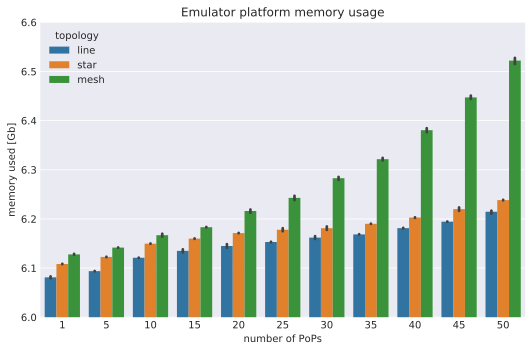

In [7]:
dff = df[df["n_pops"] < 51].copy()
dff["mem_used"] = dff["mem_used"].map(lambda x: x / (1024 * 1024 * 1024))
#min_mem = dff["mem_used"].min() - 0.1
#dff["mem_used"] -= min_mem
ax = sns.factorplot(x='n_pops',
                    y='mem_used',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("memory used [Gb]")
ax.set(ylim=(6, 6.6))
plt.title("Emulator platform memory usage")
plt.tight_layout()
ax.savefig("plots/sdk_emu_mem_compare_line_star.png", dpi=300)

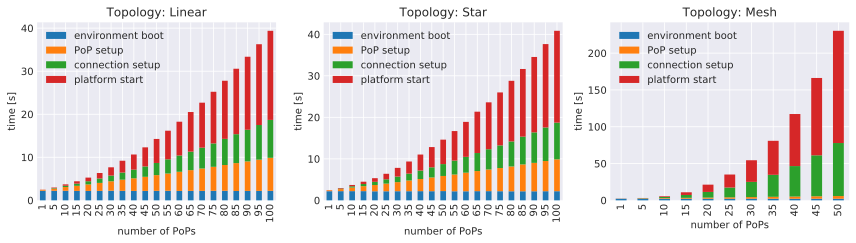

In [8]:
lbl_env_boot = "environment boot"
lbl_pop_create = "PoP setup"
lbl_link_create = "connection setup"
lbl_topo_start = "platform start"

dff = df.rename(columns={"time_env_boot": lbl_env_boot,
                        "time_pop_create": lbl_pop_create,
                        "time_link_create": lbl_link_create,
                        "time_topo_start": lbl_topo_start})
df_line = dff[dff["topology"] == "line"].groupby(["n_pops"]).mean()
df_line = df_line[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]
df_star = dff[dff["topology"] == "star"].groupby(["n_pops"]).mean()
df_star = df_star[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]
df_mesh = dff[dff["topology"] == "mesh"].groupby(["n_pops"]).mean()
df_mesh = df_mesh[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
f.set_size_inches(12, 3.5)
df_line.plot.bar(ax=ax1, stacked=True)
df_star.plot.bar(ax=ax2, stacked=True)
df_mesh.plot.bar(ax=ax3, stacked=True)
ax1.set_xlabel("number of PoPs")
ax2.set_xlabel("number of PoPs")
ax3.set_xlabel("number of PoPs")
ax1.set_ylabel("time [s]")
ax2.set_ylabel("time [s]")
ax3.set_ylabel("time [s]")
ax1.set_title("Topology: Linear")
ax2.set_title("Topology: Star")
ax3.set_title("Topology: Mesh")
plt.tight_layout()
f.savefig("plots/sdk_emu_startup_breakdown.png", dpi=300)

## KPI SDK.3 (Testing environment setup time): TopologyZoo Experiment

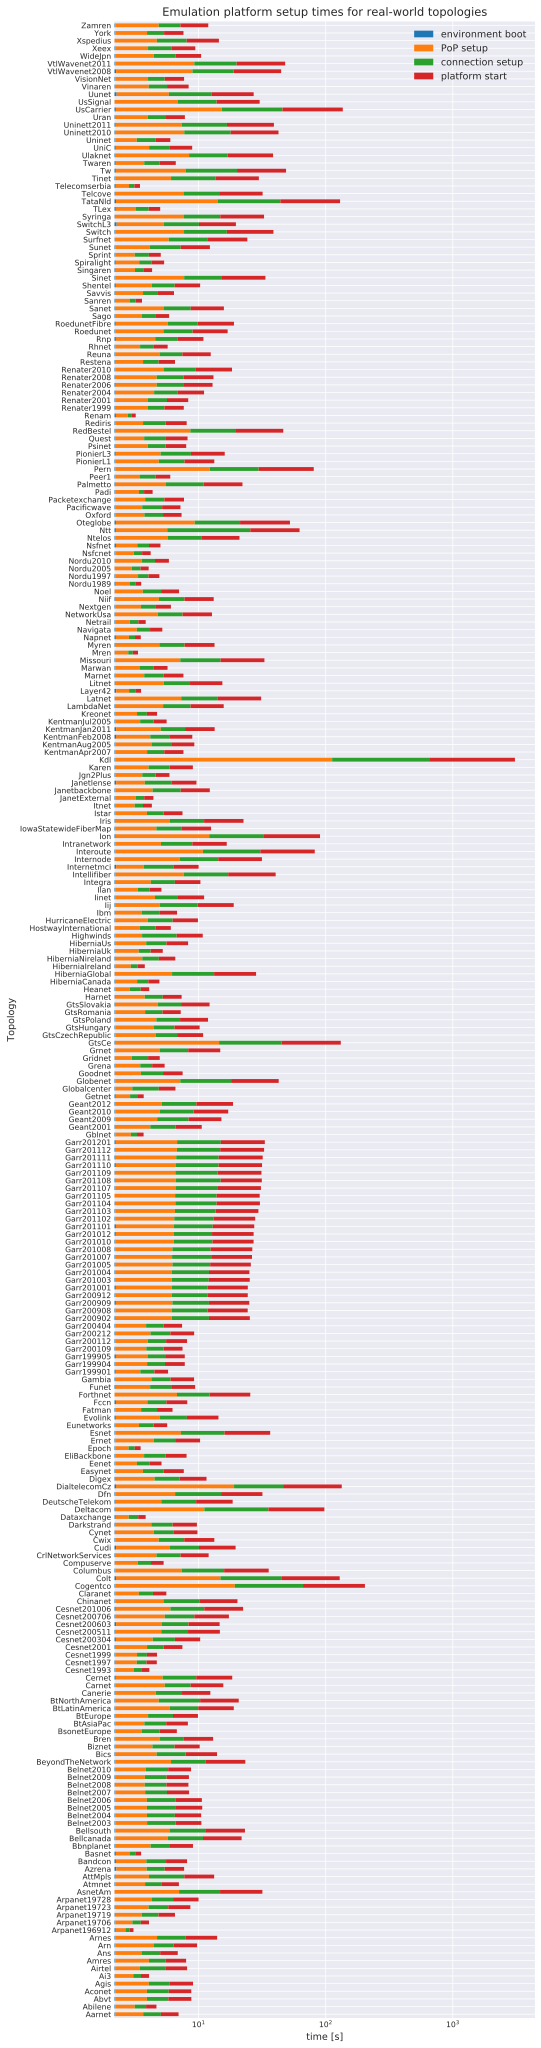

In [9]:
# read results
df2 = pd.read_pickle("data/2017-12-08-topologyzoo-5rep.pkl")
#print(df2["time_env_boot"])
lbl_env_boot = "environment boot"
lbl_pop_create = "PoP setup"
lbl_link_create = "connection setup"
lbl_topo_start = "platform start"

dff = df2.rename(columns={"time_env_boot": lbl_env_boot,
                        "time_pop_create": lbl_pop_create,
                        "time_link_create": lbl_link_create,
                        "time_topo_start": lbl_topo_start})
dff = dff.groupby(["topology"]).mean()
dff = dff[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]

f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(8, 30)
#ax.set_yscale('log', nonposy='clip')
ax.set_xscale('log', nonposx='clip')
ax = dff.plot.barh(ax=ax, stacked=True, fontsize=8)
ax.set_xlabel("time [s]")
ax.set_ylabel("Topology")
ax.set_title("Emulation platform setup times for real-world topologies")
plt.tight_layout()
plt.savefig("plots/sdk_emu_startup_topologyzoo.png", dpi=300)



                 mem_available      mem_free  mem_percent     mem_total  \
topology                                                                  
Abilene           1.456580e+10  6.799889e+09        12.80  1.671238e+10   
Arpanet196912     1.460269e+10  6.941756e+09        12.60  1.671238e+10   
Arpanet19728      1.452935e+10  6.887178e+09        13.10  1.671238e+10   
AsnetAm           1.442225e+10  6.770723e+09        13.70  1.671238e+10   
Basnet            1.457084e+10  6.739866e+09        12.80  1.671238e+10   
Belnet2010        1.453871e+10  6.733243e+09        13.00  1.671238e+10   
BtAsiaPac         1.454047e+10  6.691241e+09        13.00  1.671238e+10   
BtEurope          1.453636e+10  6.823519e+09        13.00  1.671238e+10   
BtLatinAmerica    1.446939e+10  6.656322e+09        13.40  1.671238e+10   
BtNorthAmerica    1.446719e+10  6.589458e+09        13.40  1.671238e+10   
Chinanet          1.449196e+10  6.760160e+09        13.30  1.671238e+10   
DeutscheTelekom   1.44998

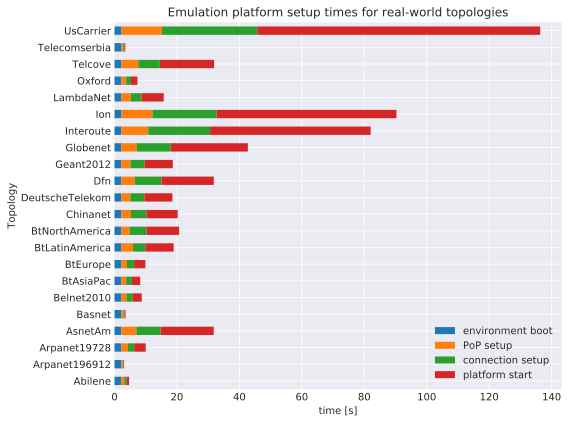

In [10]:
# read results
df2 = pd.read_pickle("data/2017-12-08-topologyzoo-5rep.pkl")
#print(df2["time_env_boot"])
filter_list = ["Abilene",
               "Arpanet196912",
               "Arpanet19728",
              "AsnetAm",
              "Basnet",
              "Belnet2010",
              "BtNorthAmerica",
              "BtLatinAmerica",
              "BtEurope",
              "BtAsiaPac",
              "Chinanet",
              "DeutscheTelekom",
              "Dfn",
              "Geant2012",
              "Globenet",
              "Interoute",
               "Ion",
              "LambdaNet",
               "Oxford",
               "Telcove",
               "Telecomserbia",
               "UsCarrier"
              ]
lbl_env_boot = "environment boot"
lbl_pop_create = "PoP setup"
lbl_link_create = "connection setup"
lbl_topo_start = "platform start"

dff = df2.rename(columns={"time_env_boot": lbl_env_boot,
                        "time_pop_create": lbl_pop_create,
                        "time_link_create": lbl_link_create,
                        "time_topo_start": lbl_topo_start})
dff = dff[dff["topology"].isin(filter_list)].groupby(["topology"]).mean()

print(dff)

dff = dff[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]



f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(8, 6)
#ax.set_yscale('log', nonposy='clip')
#ax.set_xscale('log', nonposx='clip')
ax = dff.plot.barh(ax=ax, stacked=True)
ax.set_xlabel("time [s]")
ax.set_ylabel("Topology")
ax.set_title("Emulation platform setup times for real-world topologies")
plt.tight_layout()
plt.savefig("plots/sdk_emu_startup_topologyzoo_selected.png", dpi=300)

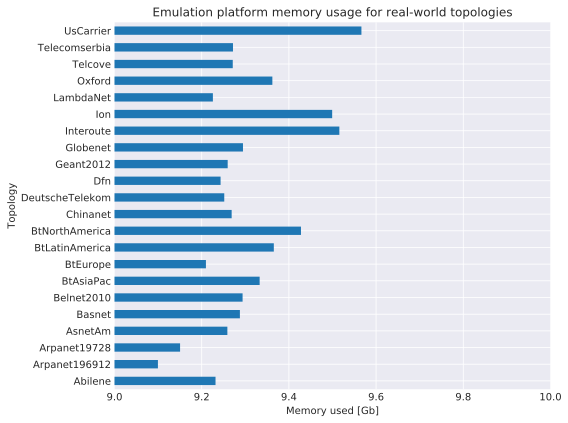

In [11]:
# read results
df2 = pd.read_pickle("data/2017-12-08-topologyzoo-5rep.pkl")
#print(df2["time_env_boot"])
filter_list = ["Abilene",
               "Arpanet196912",
               "Arpanet19728",
              "AsnetAm",
              "Basnet",
              "Belnet2010",
              "BtNorthAmerica",
              "BtLatinAmerica",
              "BtEurope",
              "BtAsiaPac",
              "Chinanet",
              "DeutscheTelekom",
              "Dfn",
              "Geant2012",
              "Globenet",
              "Interoute",
               "Ion",
              "LambdaNet",
               "Oxford",
               "Telcove",
               "Telecomserbia",
               "UsCarrier"
              ]

dff = df2[df2["topology"].isin(filter_list)].groupby(["topology"]).mean()
dff = dff[["mem_used"]]
dff["mem_used"] = dff["mem_used"].map(lambda x: x / (1024 * 1024 * 1024))

f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(8, 6)
#ax.set_yscale('log', nonposy='clip')
#ax.set_xscale('log', nonposx='clip')
ax = dff.plot.barh(ax=ax, stacked=False, legend=False)
ax.set_xlim(9, 10)
ax.set_xlabel("Memory used [Gb]")
ax.set_ylabel("Topology")
ax.set_title("Emulation platform memory usage for real-world topologies")
plt.tight_layout()
plt.savefig("plots/sdk_emu_memory_topologyzoo_selected.png", dpi=300)

## KPI SDK.4 (Test platform scalability): Time required to start NS

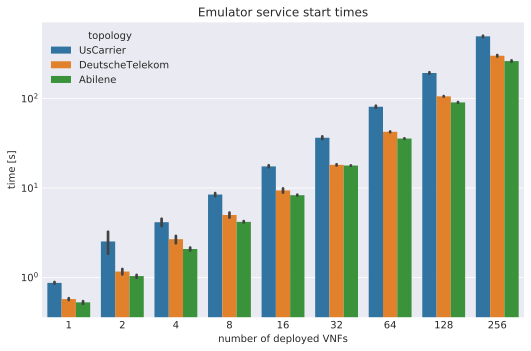

In [12]:
dff = pd.read_pickle("data/2017-12-09-service-start-topozoo.pkl")

ax = sns.factorplot(x='service_size',
                    y='time_service_start',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.fig.get_axes()[0].set_yscale('log', nonposy='clip')
ax.set_xlabels("number of deployed VNFs")
ax.set_ylabels("time [s]")
plt.title("Emulator service start times")
plt.tight_layout()
ax.savefig("plots/sdk_emu_service_start_time.png", dpi=300)

## OSM VIM Setup Time Experiment

** Attention: OSM VIM list has a bug since the SO does not support to set a query limit. RO uses 100 per default. As a results, services can only be started on the first 100 PoPs **

Hardcoded limit: https://osm.etsi.org/gitweb/?p=osm/RO.git;a=blob;f=osm_ro/httpserver.py;h=0497bbacc9b4efd387ddcb896aef6fa591c1d6b3;hb=HEAD Line 277


topology
Abilene             5.395440
Arpanet196912       1.952140
Arpanet19728       14.072922
AsnetAm            32.376657
Basnet              3.413347
Belnet2010         10.735668
BtAsiaPac           9.758482
BtEurope           11.696236
BtLatinAmerica     25.149969
BtNorthAmerica     17.650660
Chinanet           21.019576
DeutscheTelekom    19.201106
Dfn                28.860991
Geant2012          19.646110
Globenet           33.417627
Interoute          56.328204
Ion                64.446743
LambdaNet          20.656075
Oxford              9.763678
Telcove            36.723826
Telecomserbia       2.915621
UsCarrier          82.660853
Name: time, dtype: float64


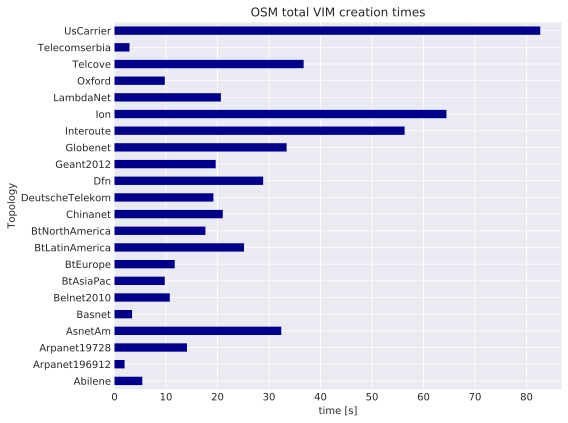

In [51]:
df1 = pd.read_pickle("data/2017-12-18-osm_zoo_setup_result.pkl")
df2 = pd.read_pickle("data/2017-12-18-osm_zoo_setup_osm_result.pkl")
df3 = df2[df2["action"] == "vim-create"].groupby(["topology"]).mean()
df4 = df2[df2["action"] == "vim-create"].groupby(["topology", "r_id"])['time'].sum()
df5 = df4.groupby(["topology"]).mean()
#print(df1)
#print(df4)
print(df5)

#df4 = df4[["time"]]

f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(8, 6)
#ax.set_yscale('log', nonposy='clip')
#ax.set_xscale('log', nonposx='clip')
ax = df5.plot.barh(ax=ax, stacked=False, legend=False, color="darkblue")
#ax.set_xlim(9, 10)
ax.set_xlabel("time [s]")
ax.set_ylabel("Topology")
ax.set_title("OSM total VIM creation times")
plt.tight_layout()
plt.savefig("plots/osm_emu_total_vim_create_time.png", dpi=300)


In [129]:
def plot_cdf(ax, d_in, col="time", *args, **kwargs):
    d_in = d_in.copy()
    samples = list(d_in[col].tolist())
    samples_sorted = np.sort(samples)
    yvals = np.arange(len(samples_sorted))/float(len(samples_sorted)) 
    ax.step(samples_sorted, yvals, *args, **kwargs)

def plot_cdf_binned(ax, d_in, bins=50, col="time", *args, **kwargs):
    d_in = d_in.copy()
    samples = list(d_in[col].tolist())
    counts, bins = np.histogram(samples, bins=bins)
    cdf = np.cumsum(counts)/np.sum(counts) 
    ax.plot(np.vstack((bins, np.roll(bins, -1))).T.flatten()[:-2],
            np.vstack((cdf, cdf)).T.flatten(),
            *args, **kwargs)

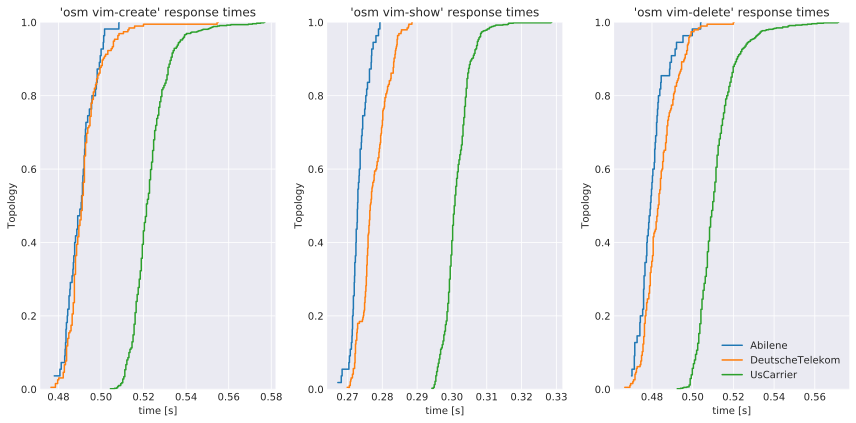

In [164]:
df1 = pd.read_pickle("data/2017-12-18-osm_zoo_setup_result.pkl")
df2 = pd.read_pickle("data/2017-12-18-osm_zoo_setup_osm_result.pkl")
df3 = df2[["action", "topology", "time"]]

topos = list(set(df3["topology"].values.tolist()))
topos = ['Abilene', 'DeutscheTelekom', 'UsCarrier']
actions = ["vim-create", "vim-show", "vim-delete"]
titles = ["'osm vim-create' response times", "'osm vim-show' response times", "'osm vim-delete' response times"]

f, axs = plt.subplots(1, 3, sharey=False)
f.set_size_inches(12, 6)

for i in range(0, 3):
    ax = axs[i]
    for t in topos:
        dff = df3[(df3["topology"] == t) & (df3["action"] == actions[i])]
        plot_cdf_binned(ax, dff, bins=150, label=t, lw=1.5)
    #ax.set_xlim(0.47, 0.57)
    ax.set_ylim(0, 1)
    ax.set_xlabel("time [s]")
    ax.set_ylabel("Topology")
    ax.set_title(titles[i])
plt.legend()
plt.tight_layout()
plt.savefig("plots/osm_emu_cdf_vim_create_time.png", dpi=300)